# Evaluating Notebook for the Instant Time Approach

In [3]:
import torch
from torch.utils.data import DataLoader
from utils import *
from tqdm import tqdm
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

model_dir = 'models/'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
df_filtered = pd.read_csv("original_training_set_filtered.csv")
df_train = pd.read_csv("splits/train.csv")
df_val = pd.read_csv("splits/val.csv")
df_test = pd.read_csv("splits/test.csv")

# Preprocessing
feature_columns = [col for col in df_train.columns if col not in ["label", "exp_name"]]
scaler = StandardScaler()
scaler.fit(df_train[feature_columns])
mean = scaler.mean_
std = scaler.scale_

# Label encoding
exp_labels = df_filtered.groupby("exp_name")["label"].first()
label_encoder = LabelEncoder()
label_encoder.fit(exp_labels.values)
exp_name_to_label = exp_labels.to_dict()

# Dataset creation with overlap
train_dataset = SensorDataset(df_train, exp_name_to_label, label_encoder, mean, std)
val_dataset   = SensorDataset(df_val,   exp_name_to_label, label_encoder, mean, std)
test_dataset  = SensorDataset(df_test,  exp_name_to_label, label_encoder, mean, std)

BATCH_SIZE = 32
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
val_loader   = DataLoader(val_dataset,   batch_size=BATCH_SIZE, shuffle=False, num_workers=4)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False, num_workers=4)

$\text{Common hyperparameters: }$
- Learning rate: $1 \times 10^{-4}$
- Weight decay: $1 \times 10^{-5}$
- Dropout: $0.2$

$\ $

$
\text{Common MLP Block: } 
[\text{Dropout}(p=0.2) \rightarrow \text{Linear}(64, 17)]
$

### Simple MLP


$
\text{Input: } \mathbb{R}^{16}
\rightarrow \text{Linear}(16, 64)
\rightarrow [\text{Common MLP Block}]
$

In [5]:
model_path = os.path.join(model_dir, "MLP_h64_12052025_2153.ckpt")

sample_train_cm, train_exp_stats = get_stats(model_path, train_loader, len(label_encoder.classes_), device)
train_performance, train_majority_votes, exp_train_cm = compute_experiment_performance(train_exp_stats)

sample_val_cm, val_exp_stats = get_stats(model_path, val_loader, len(label_encoder.classes_), device)
val_performance, val_majority_votes, exp_val_cm = compute_experiment_performance(val_exp_stats)

sample_test_cm, test_exp_stats = get_stats(model_path, test_loader, len(label_encoder.classes_), device)
test_performance, test_majority_votes, exp_test_cm = compute_experiment_performance(test_exp_stats)

100%|██████████| 1399/1399 [01:03<00:00, 22.01it/s]


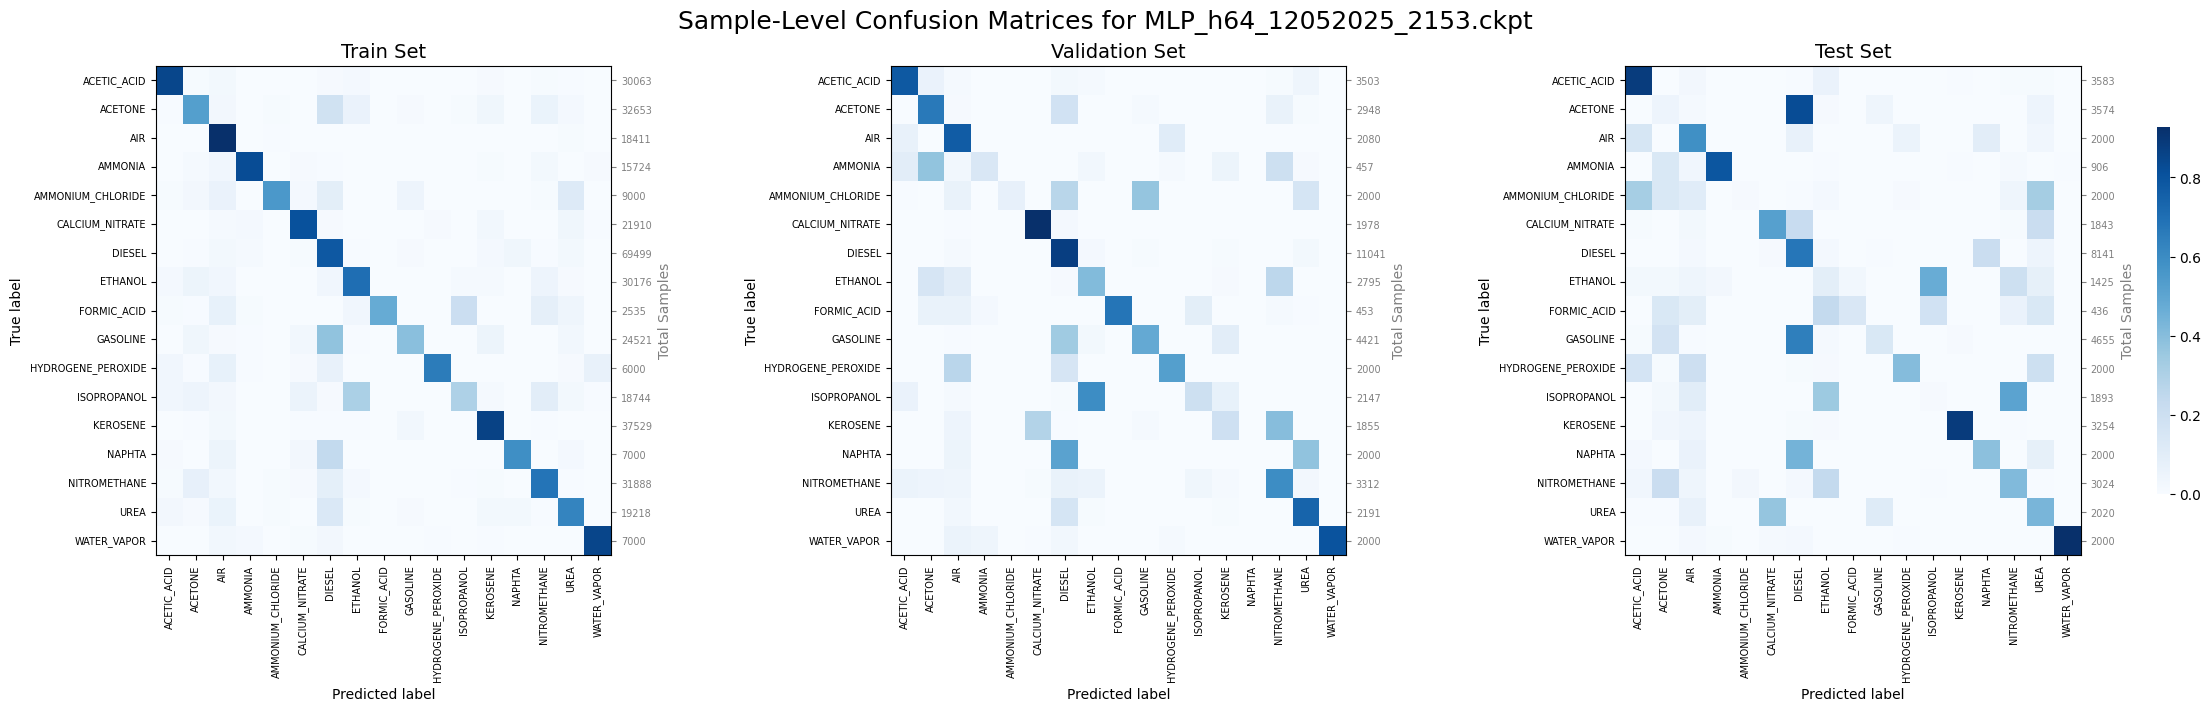

Train Performance: 0.799410029498525
Validation Performance: 0.6585365853658537
Test Performance: 0.43902439024390244


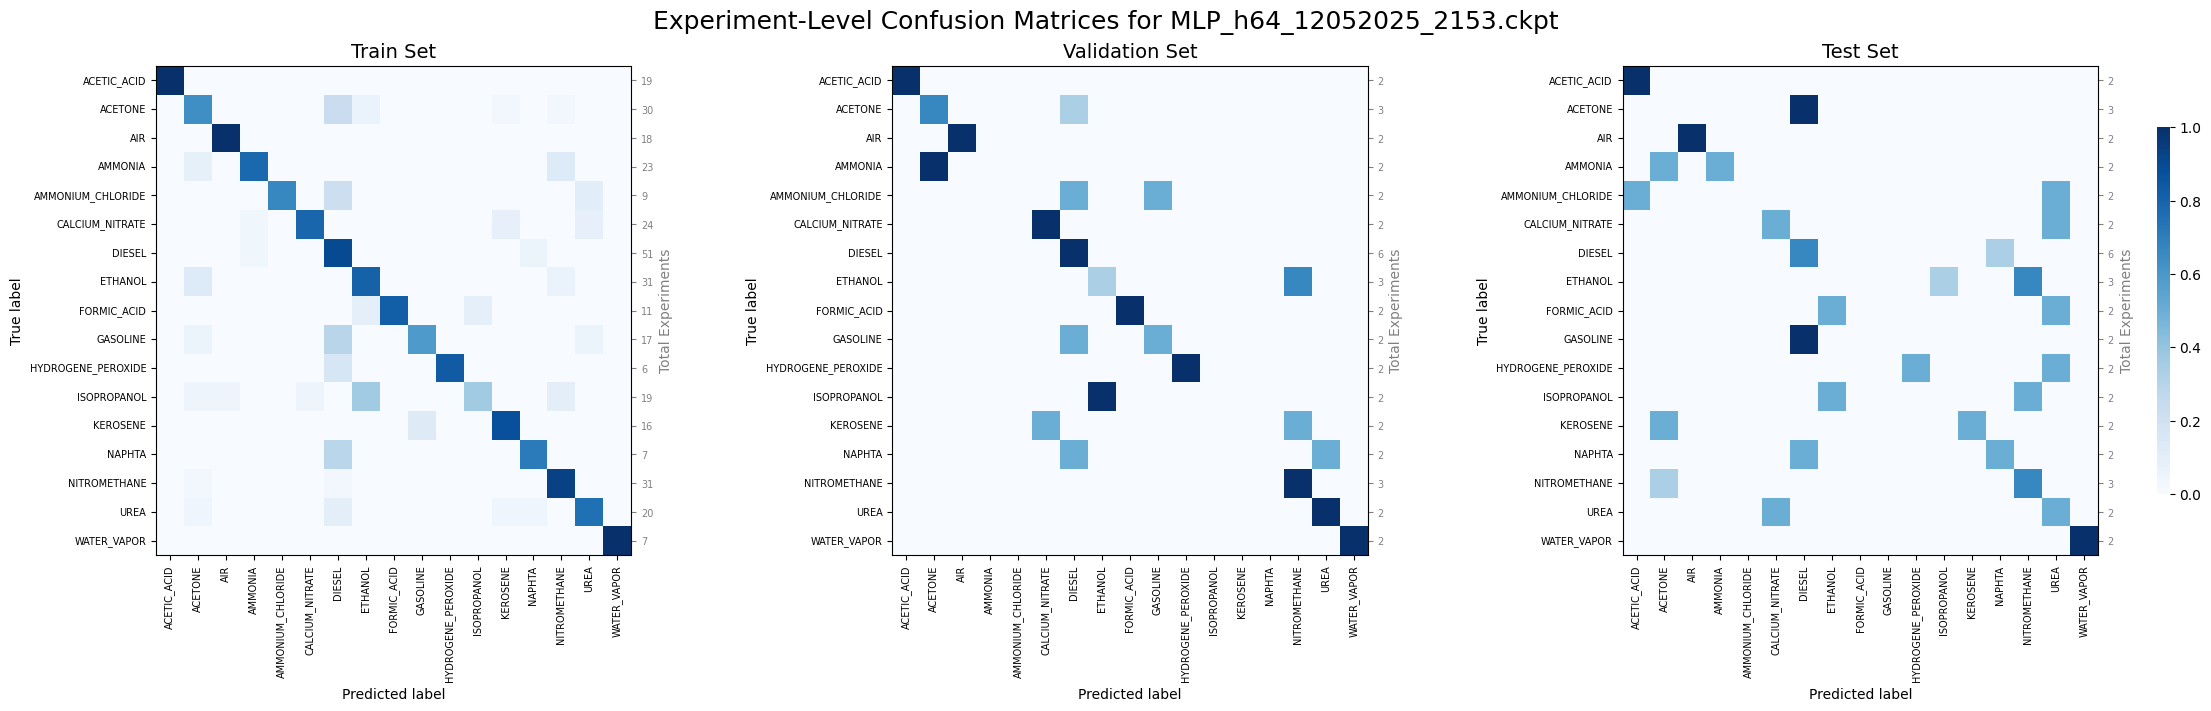

In [ ]:
# Plotting the sample-level confusion matrices
plot_confusion_matrices(
    sample_train_cm,
    sample_val_cm,
    sample_test_cm,
    suptitle=f'Sample-Level Confusion Matrices for {os.path.basename(model_path)}',
    class_names=label_encoder.classes_,
    cmap='Blues',
    cm_type="Sample"
)

print("Train Performance:", train_performance)
print("Validation Performance:", val_performance)
print("Test Performance:", test_performance)

# Plotting the experiment-level confusion matrices
plot_confusion_matrices(
    exp_train_cm,
    exp_val_cm,
    exp_test_cm,
    suptitle=f'Experiment-Level Confusion Matrices for {os.path.basename(model_path)}',
    class_names=label_encoder.classes_,
    cmap='Blues',
    cm_type="Experiment"
    )
 

### Encoder + MLP

$
\text{Input: } \mathbb{R}^{16}
\rightarrow \text{Linear}(16, 8)
\rightarrow \text{Linear}(8, 64)
\rightarrow [\text{Common MLP Block}]
$


In [7]:
model_path = os.path.join(model_dir, "EMLP_h64_l8_11052025_1441.ckpt")

sample_train_cm, train_exp_stats = get_stats(model_path, train_loader, len(label_encoder.classes_), device)
train_performance, train_majority_votes, exp_train_cm = compute_experiment_performance(train_exp_stats)

sample_val_cm, val_exp_stats = get_stats(model_path, val_loader, len(label_encoder.classes_), device)
val_performance, val_majority_votes, exp_val_cm = compute_experiment_performance(val_exp_stats)

sample_test_cm, test_exp_stats = get_stats(model_path, test_loader, len(label_encoder.classes_), device)
test_performance, test_majority_votes, exp_test_cm = compute_experiment_performance(test_exp_stats)

100%|██████████| 1399/1399 [01:07<00:00, 20.70it/s]


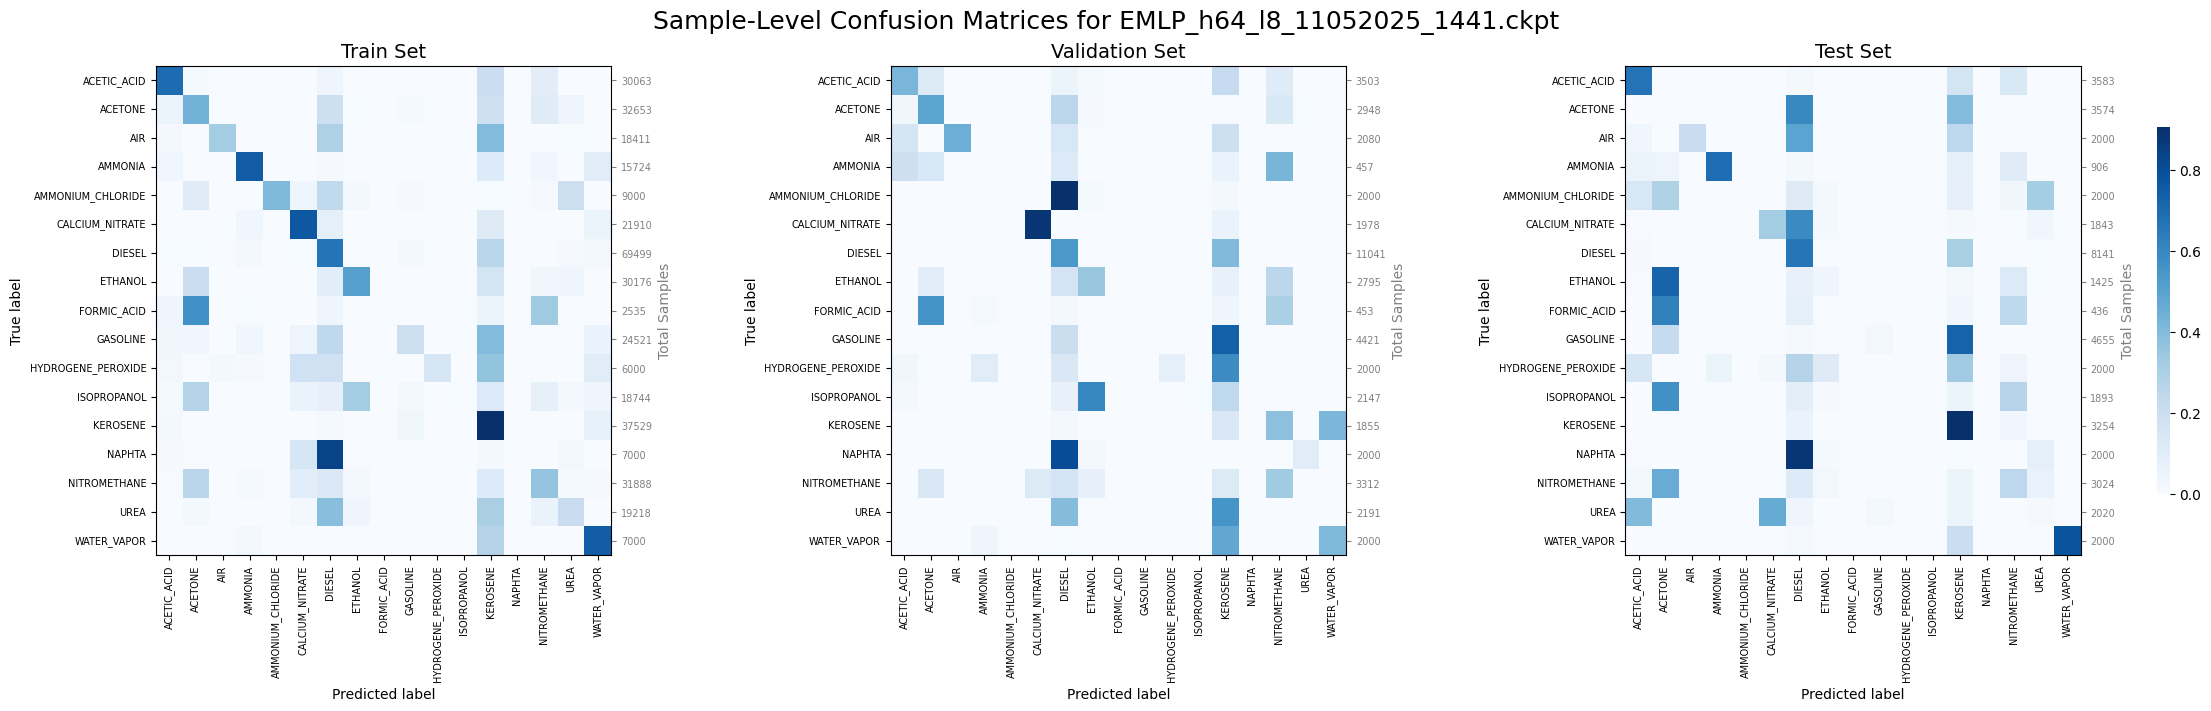

Train Performance: 0.4749262536873156
Validation Performance: 0.3170731707317073
Test Performance: 0.2926829268292683


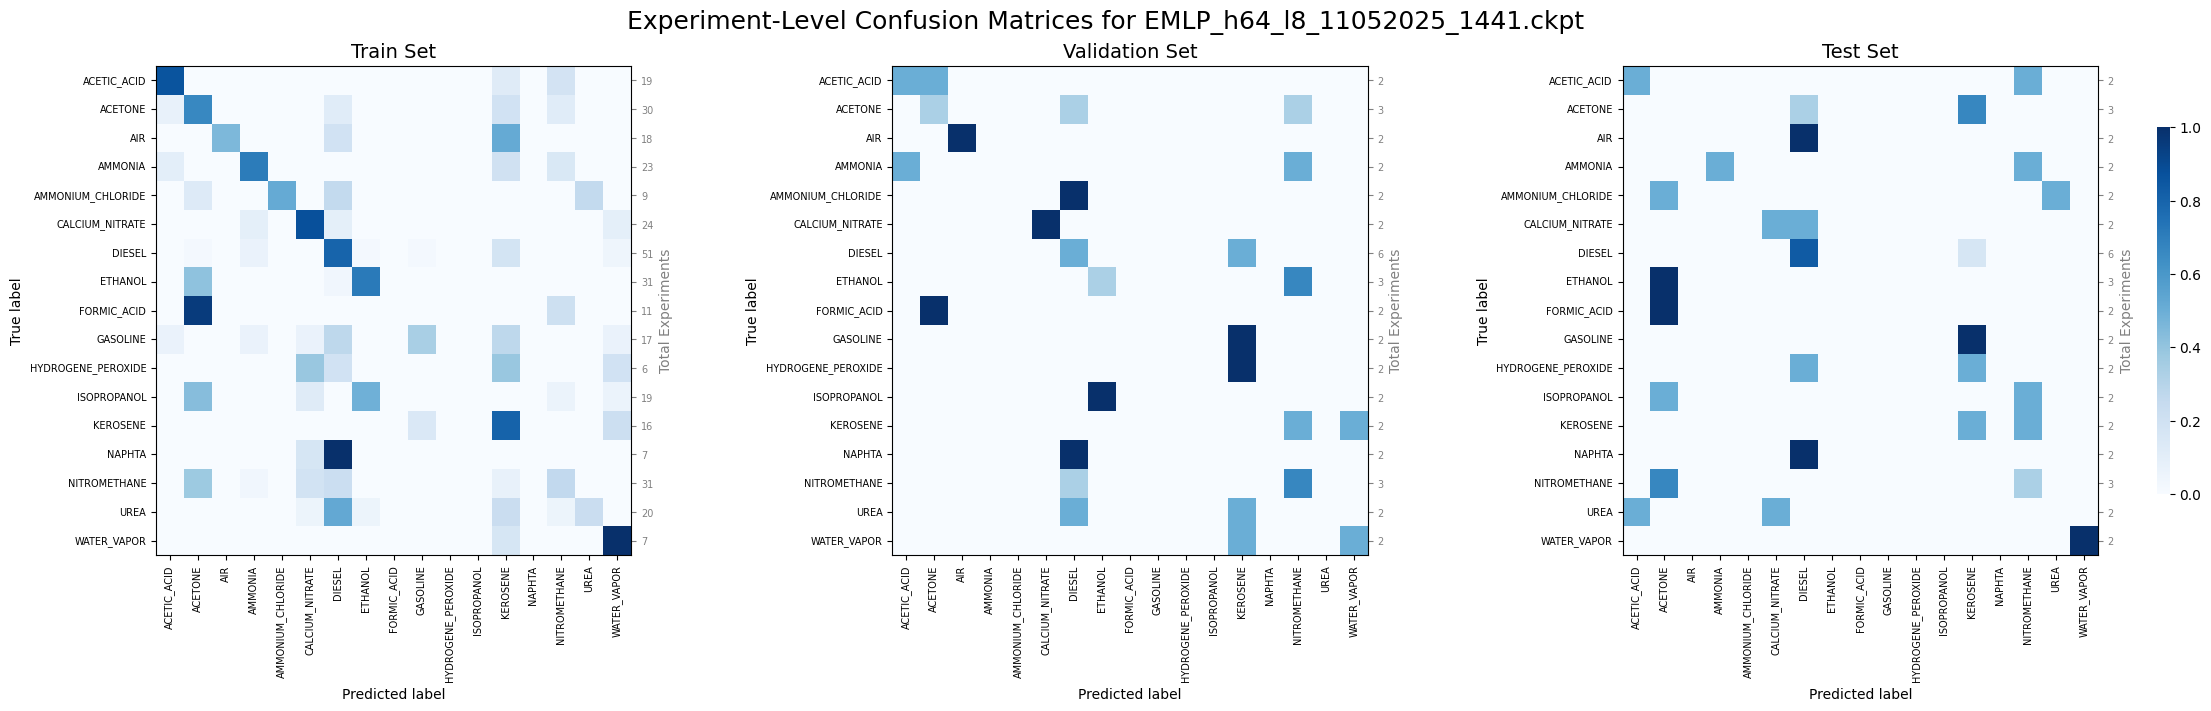

In [8]:
# Plotting the sample-level confusion matrices
plot_confusion_matrices(
    sample_train_cm,
    sample_val_cm,
    sample_test_cm,
    suptitle=f'Sample-Level Confusion Matrices for {os.path.basename(model_path)}',
    class_names=label_encoder.classes_,
    cmap='Blues',
    cm_type="Sample"
)

print("Train Performance:", train_performance)
print("Validation Performance:", val_performance)
print("Test Performance:", test_performance)

# Plotting the experiment-level confusion matrices
plot_confusion_matrices(
    exp_train_cm,
    exp_val_cm,
    exp_test_cm,
    suptitle=f'Experiment-Level Confusion Matrices for {os.path.basename(model_path)}',
    class_names=label_encoder.classes_,
    cmap='Blues',
    cm_type="Experiment"
)

$
\text{Input: } \mathbb{R}^{16}
\rightarrow \text{Linear}(16, 4)
\rightarrow \text{Linear}(4, 64)
\rightarrow [\text{Common MLP Block}]
$

In [9]:
model_path = os.path.join(model_dir, "EMLP_h64_l4_11052025_2117.ckpt")

sample_train_cm, train_exp_stats = get_stats(model_path, train_loader, len(label_encoder.classes_), device)
train_performance, train_majority_votes, exp_train_cm = compute_experiment_performance(train_exp_stats)

sample_val_cm, val_exp_stats = get_stats(model_path, val_loader, len(label_encoder.classes_), device)
val_performance, val_majority_votes, exp_val_cm = compute_experiment_performance(val_exp_stats)

sample_test_cm, test_exp_stats = get_stats(model_path, test_loader, len(label_encoder.classes_), device)
test_performance, test_majority_votes, exp_test_cm = compute_experiment_performance(test_exp_stats)

100%|██████████| 1399/1399 [01:02<00:00, 22.35it/s]


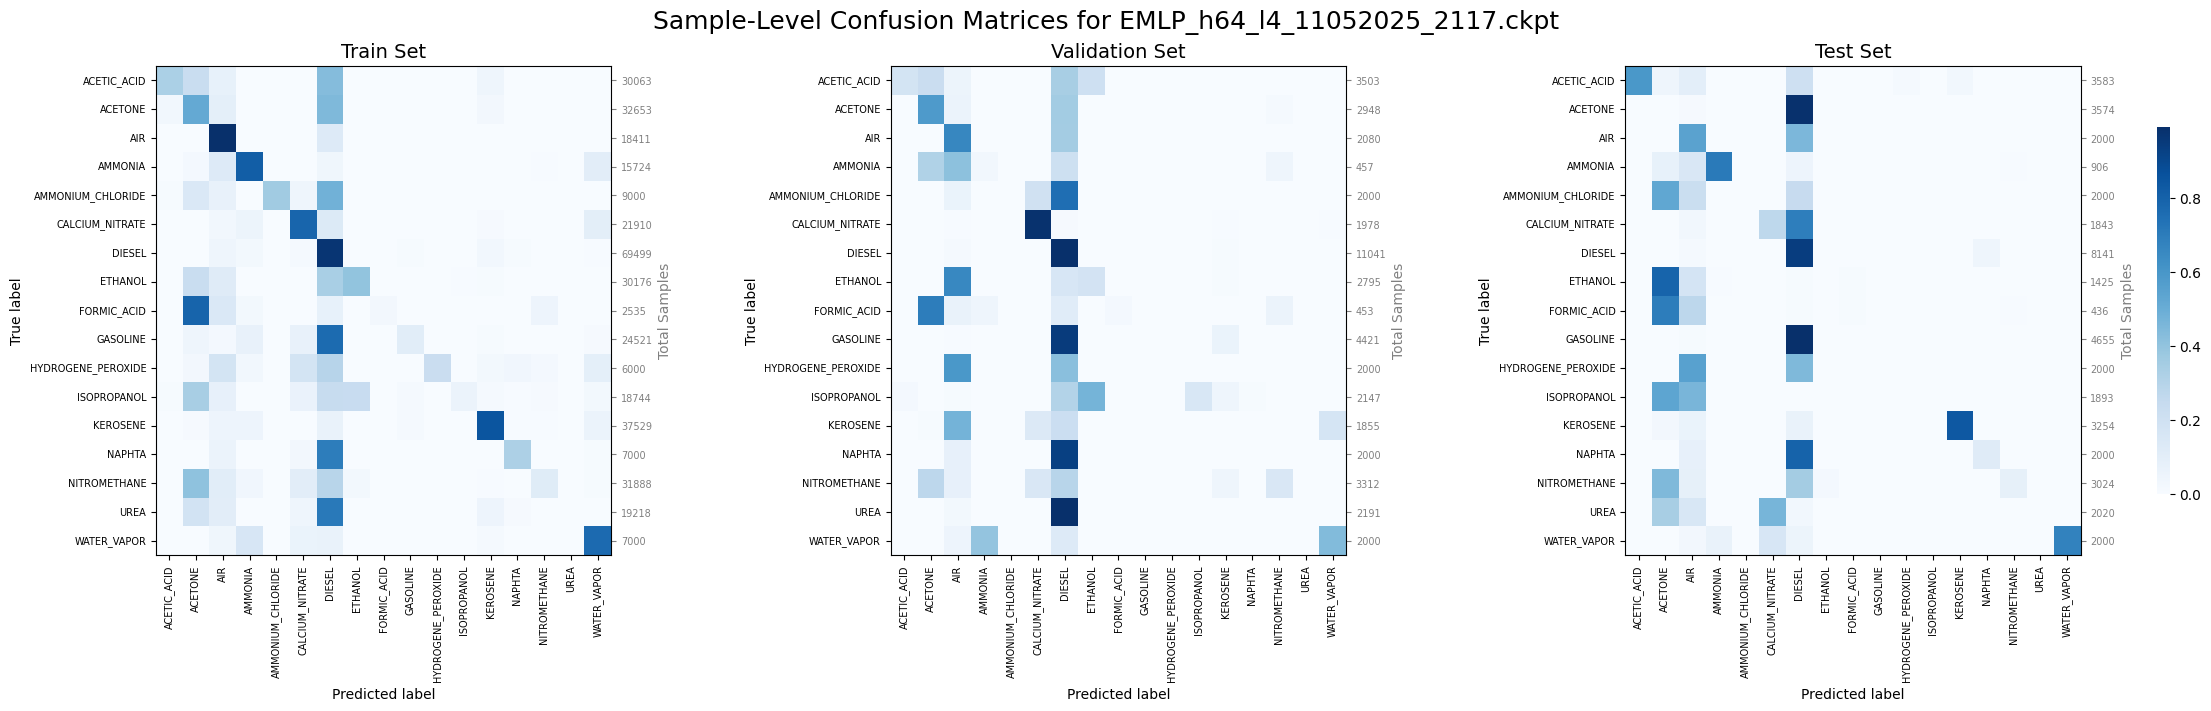

Train Performance: 0.4778761061946903
Validation Performance: 0.34146341463414637
Test Performance: 0.34146341463414637


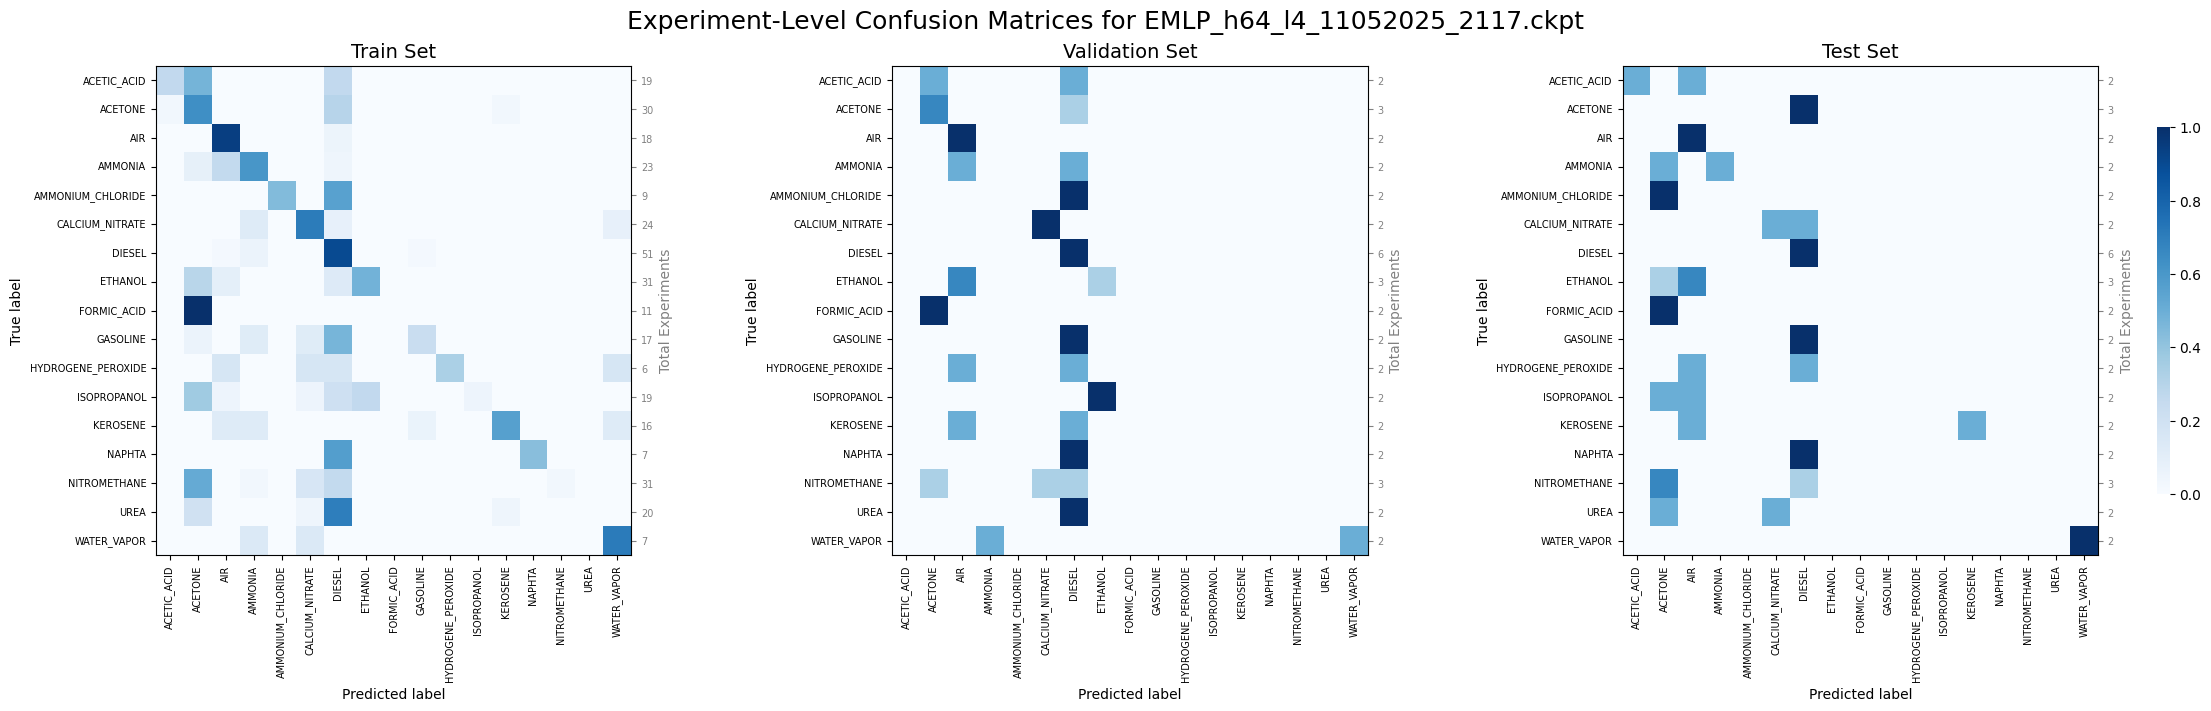

In [10]:
# Plotting the sample-level confusion matrices
plot_confusion_matrices(
    sample_train_cm,
    sample_val_cm,
    sample_test_cm,
    suptitle=f'Sample-Level Confusion Matrices for {os.path.basename(model_path)}',
    class_names=label_encoder.classes_,
    cmap='Blues',
    cm_type="Sample"
)

print("Train Performance:", train_performance)
print("Validation Performance:", val_performance)
print("Test Performance:", test_performance)

# Plotting the experiment-level confusion matrices
plot_confusion_matrices(
    exp_train_cm,
    exp_val_cm,
    exp_test_cm,
    suptitle=f'Experiment-Level Confusion Matrices for {os.path.basename(model_path)}',
    class_names=label_encoder.classes_,
    cmap='Blues',
    cm_type="Experiment"
)